In [3]:
import sys
import os
sys.path.append("/home/nakamura/network_dissection/NetDissect/src")
os.chdir("/home/nakamura/network_dissection/NetDissect/")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from viewprobe import NetworkProbe
from category_info import category_info
script = "/home/nakamura/network_dissection/NetDissect/research/top_iou_detected_ratio_1227.ipynb"
% matplotlib inline

In [4]:
# define models
alex = {}
alex["name"] = "alexnet_imagenet"
alex["directory"] = "./dissection/alexnet_imagenet_full_conv_384/"
alex["blobs"] = ["conv1", "conv2", "conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

vgg_material = {}
vgg_material["name"] = "vgg_material"
vgg_material["directory"] = "./dissection/vgg_material_full_conv/"
vgg_material["blobs"] = ["conv1_2", "conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

sentibank = {}
sentibank["name"] = "sentibank"
sentibank["directory"] = "./dissection/caffe_sentibank_full_conv/"
sentibank["blobs"] = ["conv1", "conv2","conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

vgg_face = {}
vgg_face["name"] = "vgg_face"
vgg_face["directory"] = "./dissection/VGG_FACE_full_conv/"
vgg_face["blobs"] = ["conv1_2", "conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

models = [alex, vgg_material, sentibank, vgg_face]

In [5]:
def ordered_iou(model, blob, threshold=0.05):
    """return ordered_iou averaged in a layer as pandas.Series
    use ration of channels exceeding threshold
    """
    path= os.path.join(model["directory"], blob + "-iou.csv")
    iou = pd.read_csv(path, index_col=0)
    iou_threshold = iou > threshold
    iou_thersh_ratio = iou_threshold.mean()
    ordered_iou = iou_thersh_ratio.sort_values(ascending=False)
    
    return ordered_iou

In [8]:
def plot_iou_top(model, blob, N, threshold=0.05):
    raw_iou = ordered_iou(model, blob, threshold=threshold)
    iou = raw_iou.values
    label = raw_iou.index.tolist()
    
    bottom = range(N)
    iou_top = iou[:N][::-1]
    label_top = label[:N][::-1]
    colors = category_info().generate_color_list(label_top)
    
    # plot
    plt.figure(figsize=(8,16))
    plt.barh(bottom, iou_top,height=0.5, align="center", color=colors)
    plt.title("Top IOU categories {}".format(model["name"] + " "+blob))
    plt.ylim(-1, N)
    plt.yticks(np.arange(0,N + 1),label_top) 
    plt.xlabel("ratio of detected channel")
    save_dir = "/home/nakamura/network_dissection/NetDissect/research/figures/top_iou/"
    file_name = "top_iou_detected_ratio_{}_".format(threshold) + model["name"] + "_" + blob + ".png"
    plt.text(0, -0.5, script)
    
    plt.savefig(os.path.join(save_dir, file_name), dpi=300)
    plt.show()

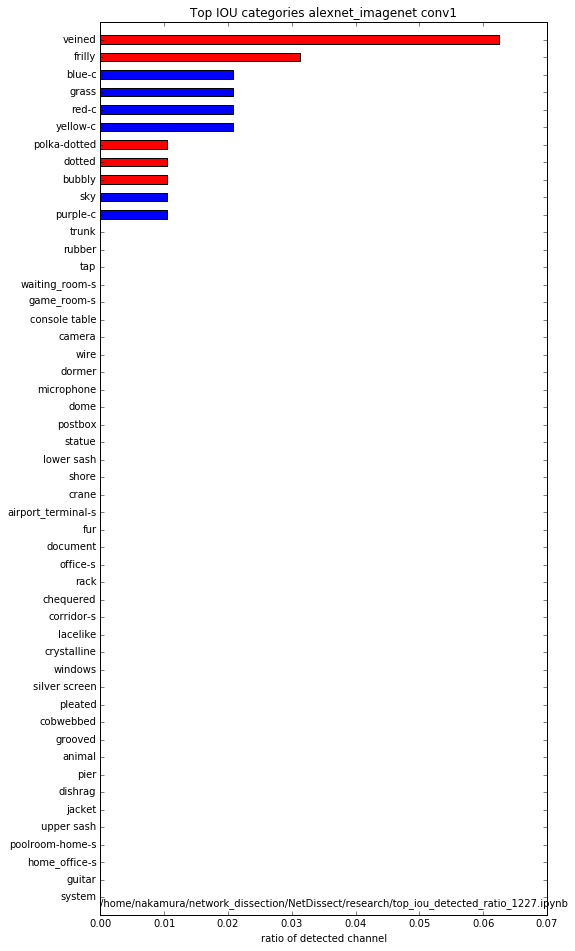

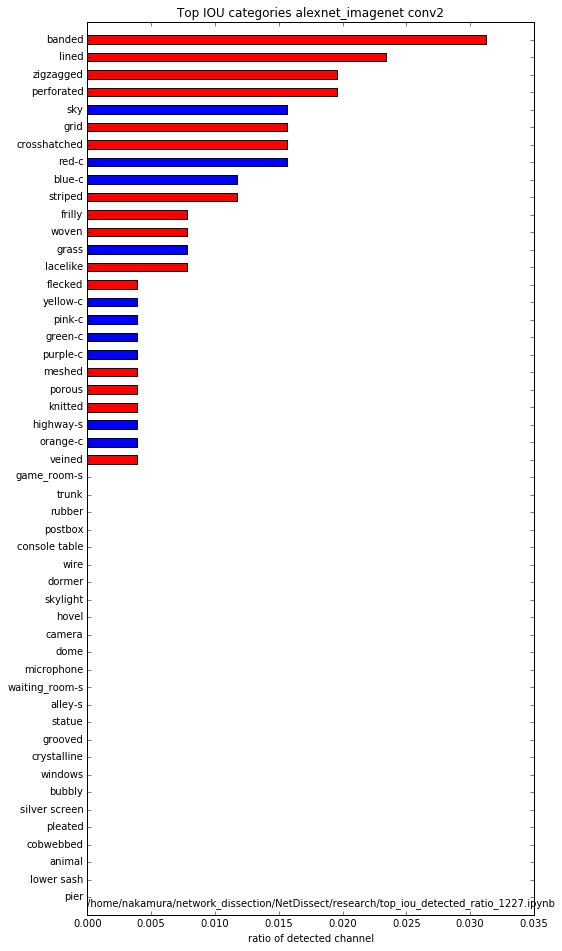

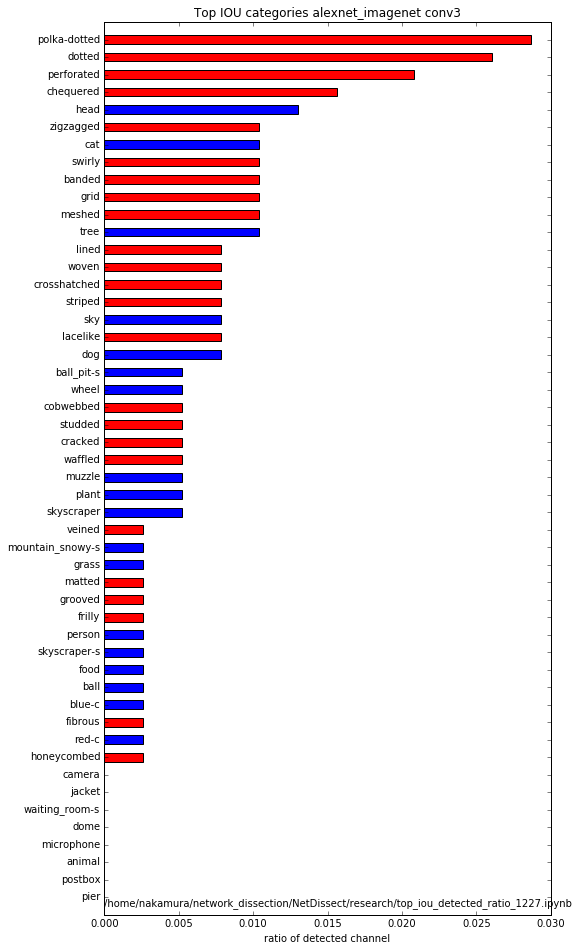

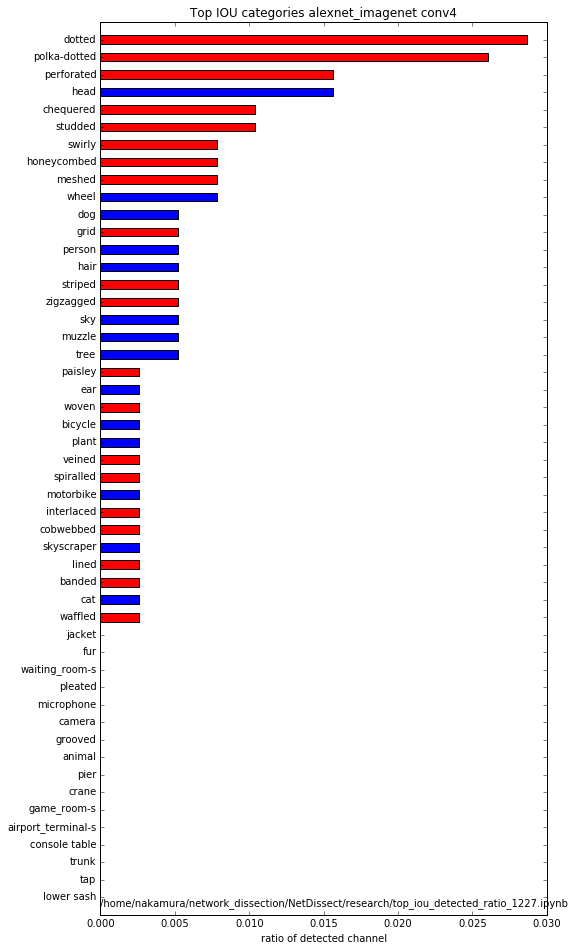

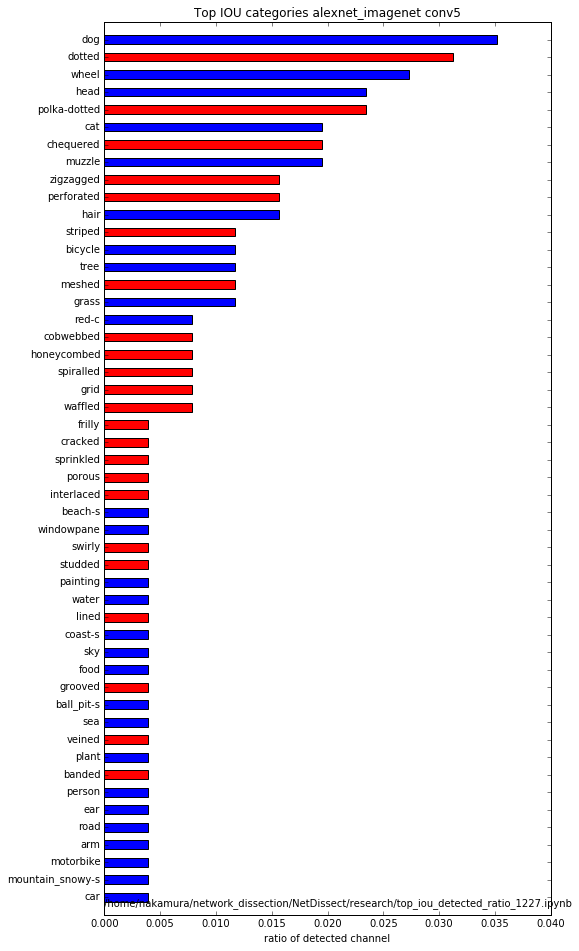

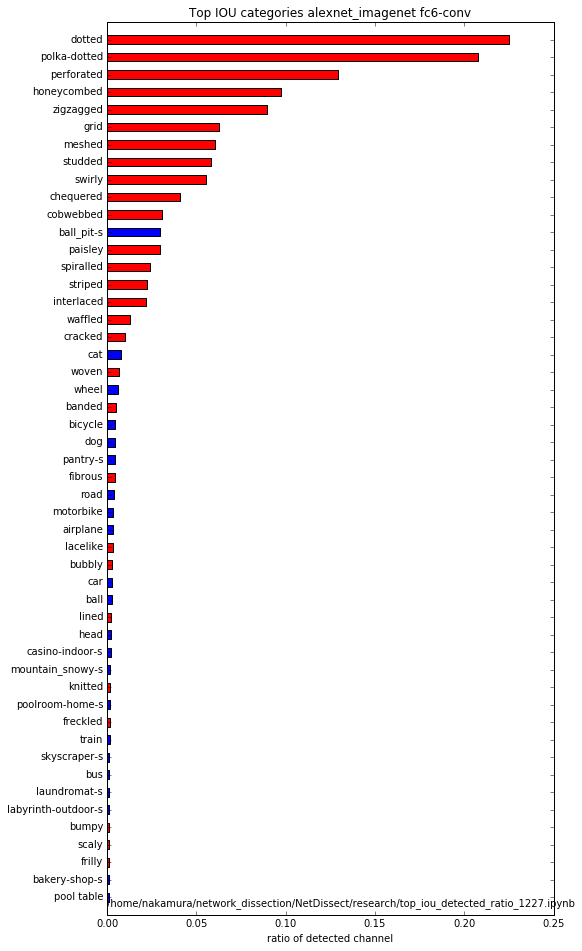

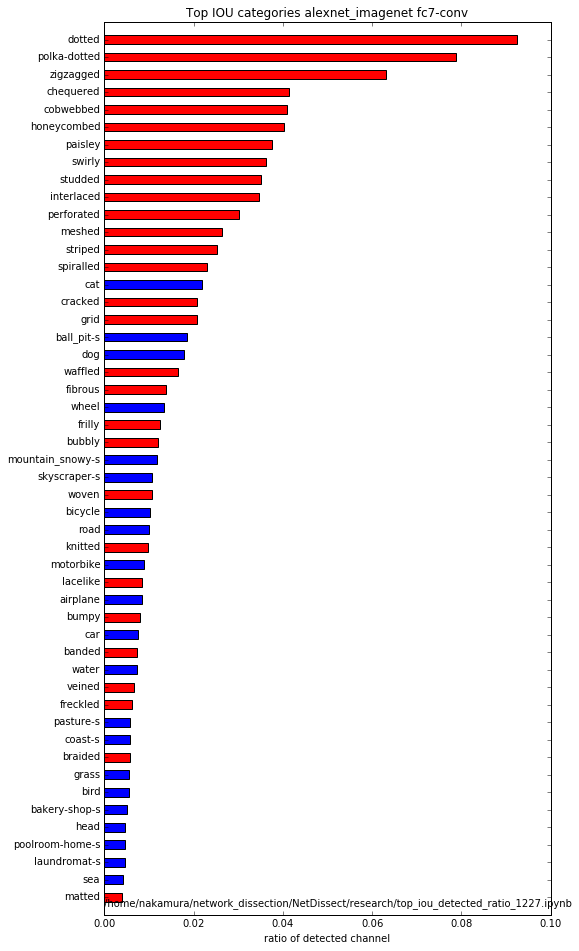

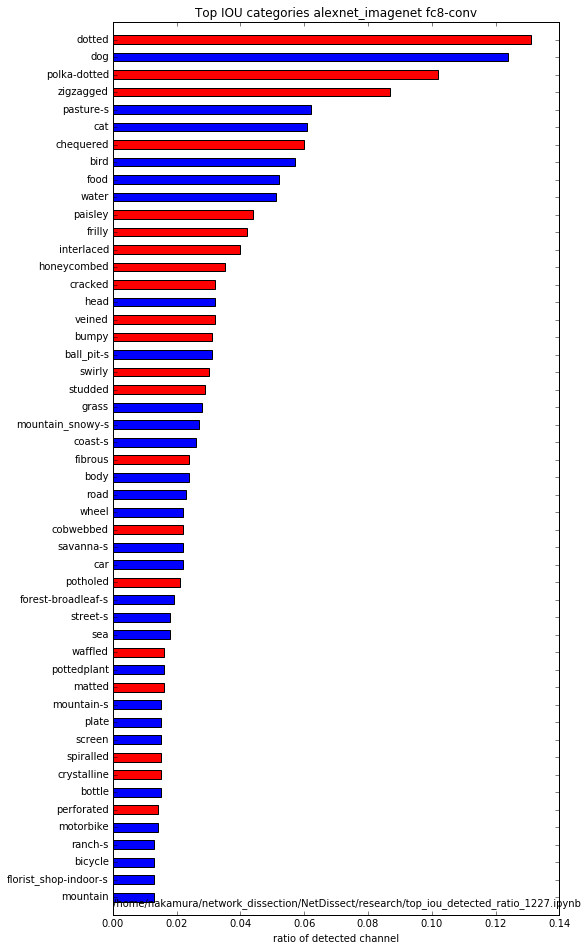

In [ ]:
for model in models:
    for blob in model["blobs"]:
        plot_iou_top(model, blob, threshold=0.05, N=50)